In [955]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [956]:
file = 'Breathalyzer_data.csv'
df = pd.read_csv(file)
#df.dropna(inplace=True)
df.head()

,Gravity_xy,Gravity_z,Light_level,Peak_intensity,Battery_temp,Exponential_a,Exponential_b,Breath_time,Evaporation_time,Ambiant_temp,Ambiant_humidity,BAC
0,7.9171,5.7525,32.9912,19.2375,24.8,2.7594,-0.3829,0.838,7.013,24.8,38,0.00
1,7.7519,5.9966,37.3944,20.0780,27.1,2.7991,-0.6046,1.217,5.183,24.8,38,0.00
2,7.4855,6.3284,10.1379,18.5940,28.6,3.0434,-0.5220,1.618,6.119,24.7,38,0.00
3,8.3827,5.0866,36.2700,12.3300,29.5,1.2649,-0.4563,1.529,3.132,24.7,38,0.00
4,6.0490,7.7000,6.3800,24.1500,24.6,2.2447,-1.8739,1.100,1.383,22.7,45,0.01


In [957]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gravity_xy        45 non-null     float64
 1   Gravity_z         45 non-null     float64
 2   Light_level       45 non-null     float64
 3   Peak_intensity    45 non-null     float64
 4   Battery_temp      45 non-null     float64
 5   Exponential_a     45 non-null     float64
 6   Exponential_b     45 non-null     float64
 7   Breath_time       45 non-null     float64
 8   Evaporation_time  45 non-null     float64
 9   Ambiant_temp      45 non-null     float64
 10  Ambiant_humidity  45 non-null     int64  
 11  BAC               45 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 4.3 KB


,Gravity_xy,Gravity_z,Light_level,Peak_intensity,Battery_temp,Exponential_a,Exponential_b,Breath_time,Evaporation_time,Ambiant_temp,Ambiant_humidity,BAC
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
mean,7.244958,6.476229,24.595713,21.529696,26.964444,2.748667,-0.641440,1.327556,5.823378,23.022222,41.60000,0.012711
std,1.476451,1.701791,16.369042,3.790999,2.038734,0.593009,0.372086,0.339635,3.080029,0.911764,3.17948,0.009586
min,0.164500,4.206600,0.828200,12.231300,21.400000,1.264900,-1.873900,0.838000,1.383000,21.600000,38.00000,0.000000
25%,6.750000,5.566800,9.275900,19.767800,25.600000,2.244700,-0.814800,1.096000,3.132000,22.500000,38.00000,0.008000
50%,7.596600,6.183000,22.946200,22.370000,27.400000,2.852300,-0.486600,1.241000,5.769000,22.700000,42.00000,0.011000
75%,8.033600,7.030000,39.358200,23.390000,28.600000,3.250000,-0.382900,1.529000,7.990000,23.600000,45.00000,0.018000
max,8.858500,14.425000,53.637100,29.909200,30.100000,3.594900,-0.168500,2.297000,12.781000,24.800000,46.00000,0.030000


In [958]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gravity_xy        45 non-null     float64
 1   Gravity_z         45 non-null     float64
 2   Light_level       45 non-null     float64
 3   Peak_intensity    45 non-null     float64
 4   Battery_temp      45 non-null     float64
 5   Exponential_a     45 non-null     float64
 6   Exponential_b     45 non-null     float64
 7   Breath_time       45 non-null     float64
 8   Evaporation_time  45 non-null     float64
 9   Ambiant_temp      45 non-null     float64
 10  Ambiant_humidity  45 non-null     int64  
 11  BAC               45 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 4.3 KB


,Gravity_xy,Gravity_z,Light_level,Peak_intensity,Battery_temp,Exponential_a,Exponential_b,Breath_time,Evaporation_time,Ambiant_temp,Ambiant_humidity,BAC
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
mean,7.244958,6.476229,24.595713,21.529696,26.964444,2.748667,-0.641440,1.327556,5.823378,23.022222,41.60000,0.012711
std,1.476451,1.701791,16.369042,3.790999,2.038734,0.593009,0.372086,0.339635,3.080029,0.911764,3.17948,0.009586
min,0.164500,4.206600,0.828200,12.231300,21.400000,1.264900,-1.873900,0.838000,1.383000,21.600000,38.00000,0.000000
25%,6.750000,5.566800,9.275900,19.767800,25.600000,2.244700,-0.814800,1.096000,3.132000,22.500000,38.00000,0.008000
50%,7.596600,6.183000,22.946200,22.370000,27.400000,2.852300,-0.486600,1.241000,5.769000,22.700000,42.00000,0.011000
75%,8.033600,7.030000,39.358200,23.390000,28.600000,3.250000,-0.382900,1.529000,7.990000,23.600000,45.00000,0.018000
max,8.858500,14.425000,53.637100,29.909200,30.100000,3.594900,-0.168500,2.297000,12.781000,24.800000,46.00000,0.030000


In [959]:
df.drop(columns=["Gravity_xy", 
                 "Gravity_z",
                 "Light_level",
                 "Peak_intensity",
                 "Exponential_a"], inplace=True)
df.head()

,Battery_temp,Exponential_b,Breath_time,Evaporation_time,Ambiant_temp,Ambiant_humidity,BAC
0,24.8,-0.3829,0.838,7.013,24.8,38,0.00
1,27.1,-0.6046,1.217,5.183,24.8,38,0.00
2,28.6,-0.5220,1.618,6.119,24.7,38,0.00
3,29.5,-0.4563,1.529,3.132,24.7,38,0.00
4,24.6,-1.8739,1.100,1.383,22.7,45,0.01


<AxesSubplot:>

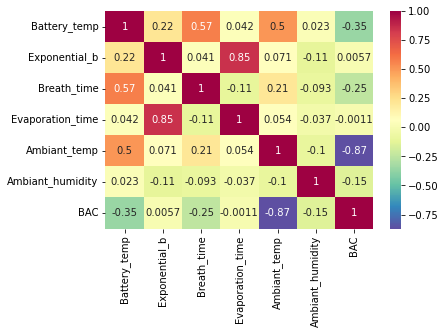

In [960]:
sns.heatmap(df.corr(), annot=True, cmap='Spectral_r')

In [961]:
#sns.pairplot(df)

In [962]:
y = df.pop('BAC').to_numpy()
scaler = StandardScaler()
x = scaler.fit_transform(df, y)

In [963]:
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    clf = linear_model.Ridge(alpha=0)
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
        
    print(f"score: {score}")


score: 0.7245703785614952
score: 0.8450259860568784
score: 0.6889905002934628
score: 0.8450116499259898
score: 0.7450205552934523
score: 0.7937091130298928
score: 0.8195411314092804
score: 0.7840424151714187
score: 0.7898487104263545
score: 0.474502706068341


In [964]:
clf = linear_model.Ridge(alpha=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(predictions)
print(y_test)

[ 0.02303304  0.00089525  0.00742025  0.00818108  0.006514    0.00455324
  0.02372517 -0.00116777  0.01494966  0.00989146  0.00676625  0.00250666
  0.00644087  0.01243791]
[0.03  0.008 0.012 0.018 0.011 0.01  0.021 0.    0.018 0.011 0.018 0.
 0.008 0.018]
